In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
from io import StringIO
from shapely.geometry import Point
import matplotlib
from typing import Optional

import pickle
import numpy as np

pd.options.mode.chained_assignment = None
import joypy
import seaborn as sns

In [2]:
os.chdir("../")
UA_stats = pd.read_csv("data/processed/urban_area_statistics.csv").query("facility_count >= 10")

In [10]:
UA_stats

,Unnamed: 0,UACE,UA_NAME,facility_count,White %,Black %,Hispanic/Latino %,Poverty rate,Renter houshold %,Vacant housing units,Median income,Median home value
12,12,70993,"Port Arthur, TX",28,1.325046,0.839057,0.565949,NaN,0.841260,0.951754,1.185035,1.099647
14,14,6058,"Beaumont, TX",11,0.455116,1.547724,1.187197,NaN,1.148787,1.518039,0.779273,0.601579
17,17,69192,"Phoenix West--Goodyear--Avondale, AZ",12,0.410138,1.385515,1.271766,NaN,1.185236,0.577427,0.855695,0.809945
27,27,4384,"Austin, TX",22,0.925648,1.285551,1.077097,NaN,0.926218,1.004870,1.033663,1.124070
34,34,51445,"Los Angeles--Long Beach--Anaheim, CA",121,0.704912,1.176718,1.225899,NaN,0.983172,0.845656,0.897944,0.822350
...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,79093,"San Juan, PR",18,0.904949,0.529393,1.003166,NaN,0.924685,0.836946,1.073587,0.972749
1024,1024,79768,"Savannah, GA",11,0.665471,1.439554,0.678295,NaN,1.163687,1.172177,0.812705,0.653844
1032,1032,41212,"Indianapolis, IN",32,0.858246,1.469991,1.420594,NaN,1.211765,1.418683,0.706154,0.627019
1051,1051,61273,"Nashville-Davidson, TN",21,0.899381,1.246056,1.088986,NaN,1.601571,1.859375,0.786112,0.932091


In [3]:
font = {'size'   : 22}
matplotlib.rc('font', **font)

In [11]:
old_names = ["hispanic_pop_ratio","black_pop_ratio", "vacant_units_ratio", "renter_households_ratio", "white_pop_ratio", "median_home_value_ratio", "median_hh_income_ratio"]
new_names = ["Hispanic/Latino %", "Black %", "Vacant housing units", "Renter houshold %", "White %", "Median home value", "Median income"]
UA_stats = UA_stats.rename(columns=dict(zip(old_names, new_names)))

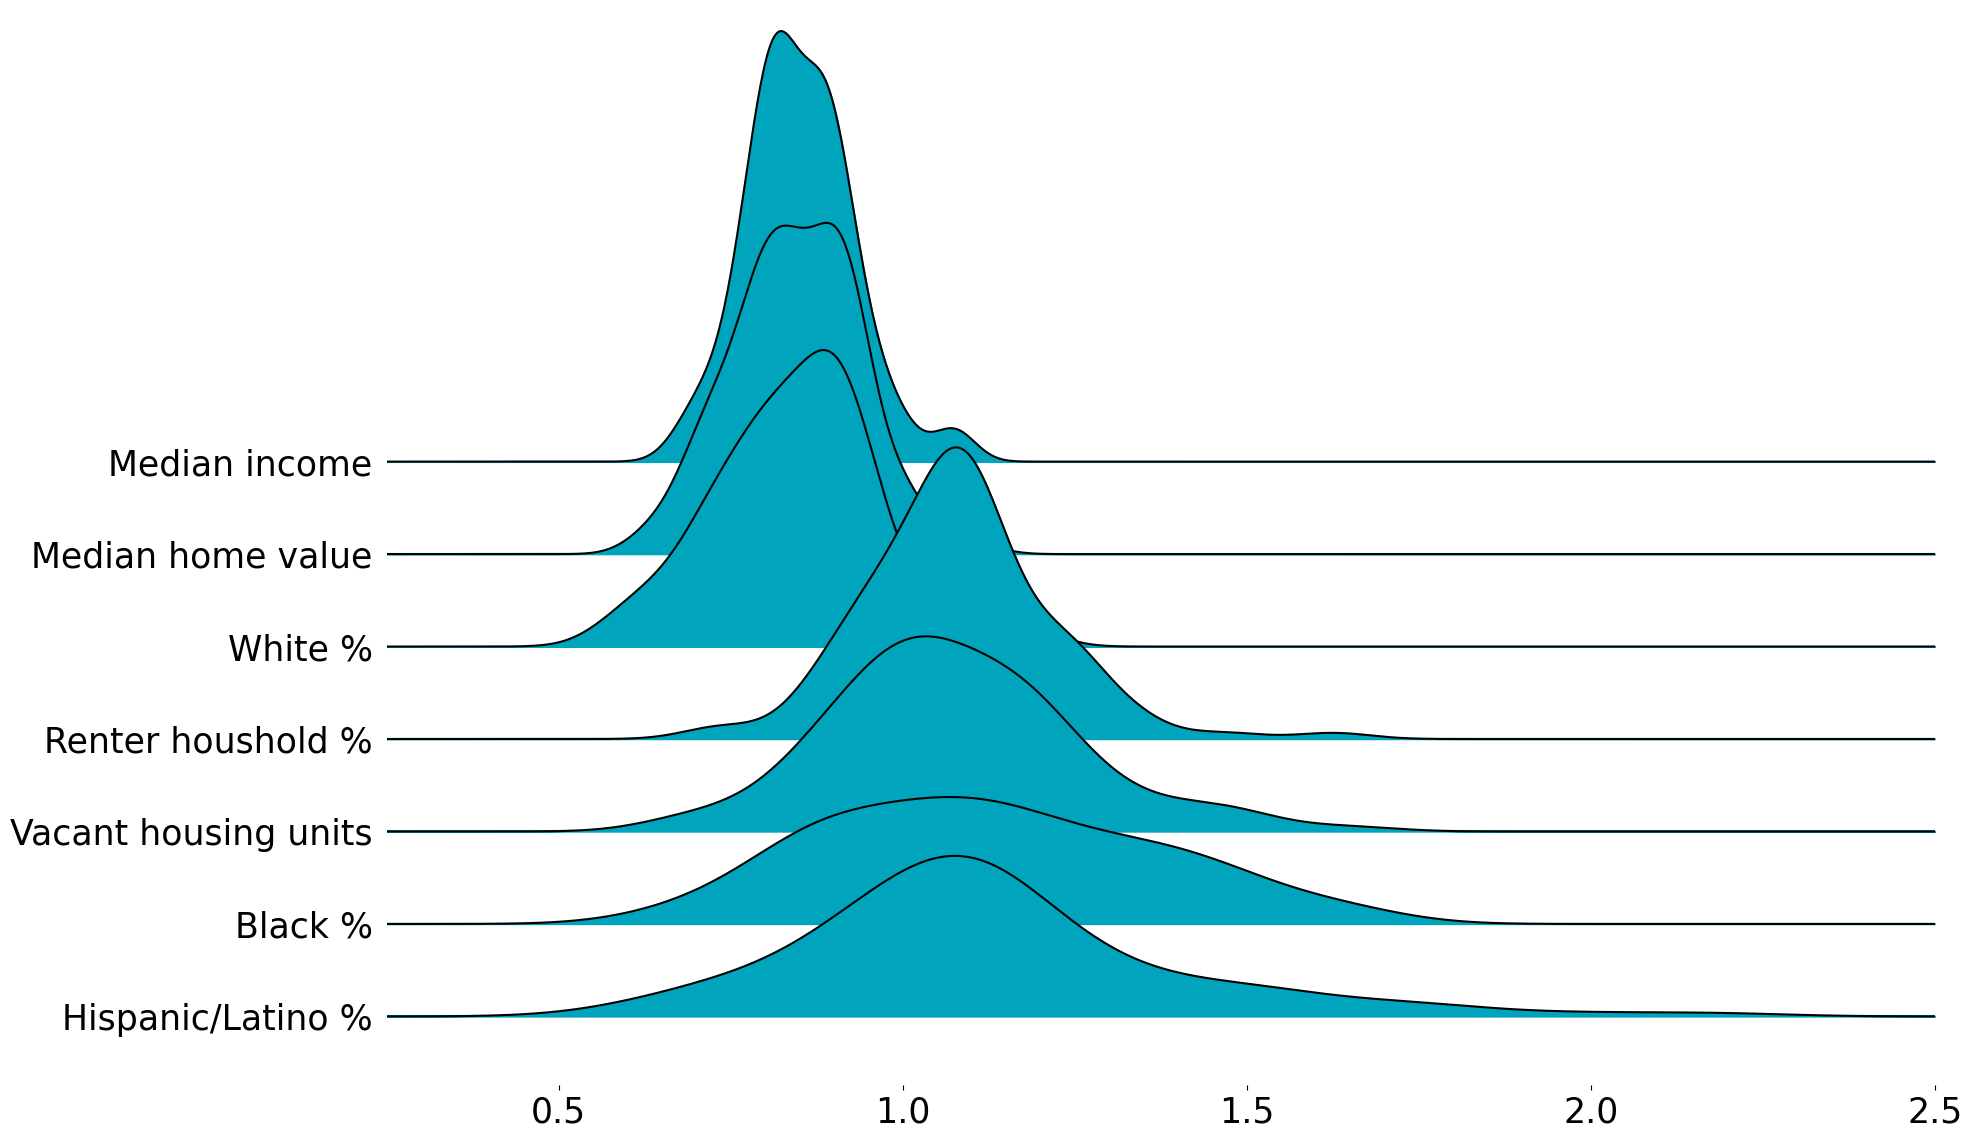

In [12]:
plt.rcParams.update({'font.size': 25})
fig, axes = joypy.joyplot(UA_stats[new_names[::-1]], color = "#00a5bd", figsize=(20,12), overlap=2.5)
plt.xlim(0.25, 2.5)
plt.show()

In [13]:
np.mean(UA_stats["Black %"] > 1)

0.7264150943396226

In [7]:
np.mean(UA_stats["White %"] > 1)

0.1320754716981132

In [8]:
np.mean(UA_stats["Median income"] > 1)

0.07547169811320754

In [9]:
UA_stats

,Unnamed: 0,UACE,UA_NAME,facility_count,White %,Black %,Hispanic/Latino %,Poverty rate,Renter houshold %,Vacant housing units,Median income,Median home value
12,12,70993,"Port Arthur, TX",28,1.325046,0.839057,0.565949,NaN,0.841260,0.951754,1.185035,1.099647
14,14,6058,"Beaumont, TX",11,0.455116,1.547724,1.187197,NaN,1.148787,1.518039,0.779273,0.601579
17,17,69192,"Phoenix West--Goodyear--Avondale, AZ",12,0.410138,1.385515,1.271766,NaN,1.185236,0.577427,0.855695,0.809945
27,27,4384,"Austin, TX",22,0.925648,1.285551,1.077097,NaN,0.926218,1.004870,1.033663,1.124070
34,34,51445,"Los Angeles--Long Beach--Anaheim, CA",121,0.704912,1.176718,1.225899,NaN,0.983172,0.845656,0.897944,0.822350
...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,79093,"San Juan, PR",18,0.904949,0.529393,1.003166,NaN,0.924685,0.836946,1.073587,0.972749
1024,1024,79768,"Savannah, GA",11,0.665471,1.439554,0.678295,NaN,1.163687,1.172177,0.812705,0.653844
1032,1032,41212,"Indianapolis, IN",32,0.858246,1.469991,1.420594,NaN,1.211765,1.418683,0.706154,0.627019
1051,1051,61273,"Nashville-Davidson, TN",21,0.899381,1.246056,1.088986,NaN,1.601571,1.859375,0.786112,0.932091
